In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import cm
import scipy.stats

import os, sys

project_root = '/user_data/mmhender/featsynth/'
sys.path.insert(0, os.path.join(project_root, 'code'))
from utils import stats_utils, plot_utils
from behav_analysis import analyze_expt1, analyze_expt2
import get_categ_discrim


In [2]:
# load image info
image_set_name = 'images_expt1'
image_list_filename = os.path.join(project_root, 'features','raw', '%s_list.csv'%(image_set_name))
labels = pd.read_csv(image_list_filename)

# figure out some image/category properties here
n_ims_each = np.sum(np.array(labels['basic_name'])==np.array(labels['basic_name'])[0])
basic_names = np.array(labels['basic_name'][0::n_ims_each])
super_names_long = np.array(labels['super_name'][0::n_ims_each])
basic_inds = np.array(labels['basic_index'][0::n_ims_each])
super_inds_long = np.array(labels['super_index'][0::n_ims_each])
n_basic = len(basic_names)
n_super = len(np.unique(super_names_long))
n_basic_each_super  = int(n_basic/n_super)
super_names = super_names_long[0::n_basic_each_super]
super_cbinds = np.repeat(np.array([0,1]), n_basic_each_super)
super_inds = np.arange(n_super)

# more image properties to organize images
image_type_names = ['pool1','pool2','pool3','pool4','orig']
n_image_types = len(image_type_names)
cue_level_names = ['basic','super']

#### get all the cosine distances

In [3]:
within_b, across_b_within_s, across_b_all, \
            within_s, across_s = \
                get_categ_discrim.compute_distances(image_set_name = 'images_expt1', \
                                                    # distance_metric='cosine', \
                                                    distance_metric='correlation', \
                                                   )

/user_data/mmhender/featsynth/features/simclr/images_expt1_simclr_block2_pca.npy
/user_data/mmhender/featsynth/features/simclr/images_expt1_simclr_block6_pca.npy
/user_data/mmhender/featsynth/features/simclr/images_expt1_simclr_block12_pca.npy
/user_data/mmhender/featsynth/features/simclr/images_expt1_simclr_block15_pca.npy


In [17]:
# within_b, across_b_within_s, across_b_all, \
#             within_s, across_s = \
#                 get_categ_discrim.compute_distances(image_set_name = 'images_expt1', \
#                                                     distance_metric='cosine', \
#                                                     # distance_metric='correlation', \
#                                                    )

/user_data/mmhender/featsynth/features/simclr/images_expt1_simclr_block2_pca.npy
/user_data/mmhender/featsynth/features/simclr/images_expt1_simclr_block6_pca.npy
/user_data/mmhender/featsynth/features/simclr/images_expt1_simclr_block12_pca.npy
/user_data/mmhender/featsynth/features/simclr/images_expt1_simclr_block15_pca.npy


#### get ratio of across to within

In [4]:
basic_sep = across_b_within_s / within_b 
basic_sep_all = across_b_all / within_b 
super_sep_each_supcat = across_s / within_s

#### average across all the basic-level categs in each superordinate category

In [5]:
within_b_each_supcat = np.array([np.mean(within_b[super_inds_long==si,:], axis=0) \
                                for si in range(n_super)])
across_b_within_s_each_supcat = np.array([np.mean(across_b_within_s[super_inds_long==si,:], axis=0) \
                                for si in range(n_super)])
across_b_all_each_supcat = np.array([np.mean(across_b_all[super_inds_long==si,:], axis=0) \
                                for si in range(n_super)])


basic_sep_each_supcat = np.array([np.mean(basic_sep[super_inds_long==si,:], axis=0) \
                                   for si in range(n_super)])

basic_sep_all_each_supcat = np.array([np.mean(basic_sep_all[super_inds_long==si,:], axis=0) \
                                   for si in range(n_super)])

#### plot average separability of each type

(1.0, 1.04)

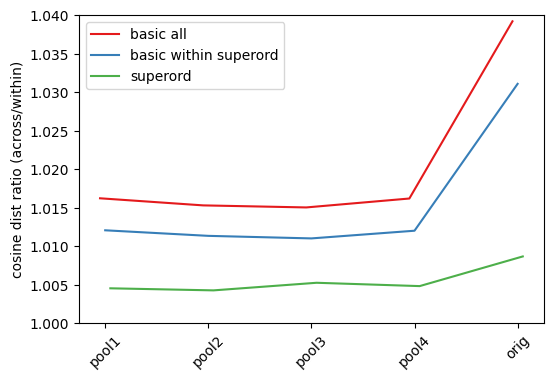

In [6]:
plot_utils.set_all_font_sizes(10)

xjitters =np.linspace(-0.05, 0.05, 3)

cue_level_colors = cm.Set1(np.linspace(0,1,9))[0:3,:]

point_types = ['o','x']
markersize = 4;


plt.figure(figsize=(6,4))

ax = plt.subplot(1,1,1)
    # lh = []

vals1 = np.mean(basic_sep_all, axis=0)
vals2 = np.mean(basic_sep, axis=0)
vals3 = np.mean(super_sep_each_supcat, axis=0)
levels = ['basic all','basic within superord','superord']

for cc, vals in enumerate([vals1, vals2, vals3]):

    h = plt.plot(np.arange(n_image_types)+xjitters[cc], vals,\
             '-',color=cue_level_colors[cc,:])

    # lh.append(h[0])

    plt.xticks(np.arange(n_image_types), image_type_names,rotation=45)


# plt.axhline(0, color=[0.8, 0.8, 0.8], linestyle='--')

# ax.legend(lh, np.repeat(cue_level_vals,2), loc='lower right')
ax.legend(levels, loc='upper left')

plt.ylabel('cosine dist ratio (across/within)')

plt.ylim([1.0, 1.04])



#### separate into natural and artificial superord categories

In [7]:
is_natural = np.array([1,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1]).astype(bool)
kind_names = ['Artificial','Natural']
n_kinds = len(kind_names)
nat_colors = cm.Greens(np.linspace(0,1,5))[[2,3],:]

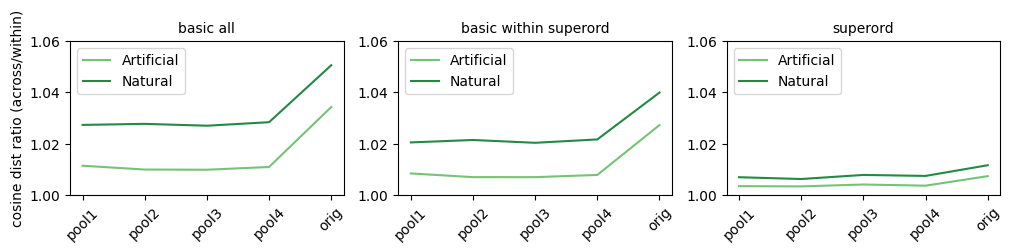

In [8]:
vals1 = np.mean(basic_sep_all, axis=0)
vals2 = np.mean(basic_sep, axis=0)
vals3 = np.mean(super_sep_each_supcat, axis=0)
levels = ['basic all','basic within superord','superord']

plt.figure(figsize=(12,2))
pi=0

for vals, level in zip([basic_sep_all_each_supcat, \
                        basic_sep_each_supcat, \
                        super_sep_each_supcat], \
                      levels):
        
    pi+=1
    ax = plt.subplot(1,3,pi)
    
    lh = []
    
    for kk in [0,1]:
    
        meanvals = np.mean(vals[is_natural==kk,:], axis=0)
    
        h = plt.plot(np.arange(n_image_types), meanvals, color=nat_colors[kk,:])
    
        lh += h
        
    ax.legend(lh, kind_names, loc='upper left');
    plt.xticks(np.arange(n_image_types), image_type_names, rotation=45);

    if pi==1:
        plt.ylabel('cosine dist ratio (across/within)')
    
    plt.ylim([1.0, 1.06])
    
    plt.title(level)

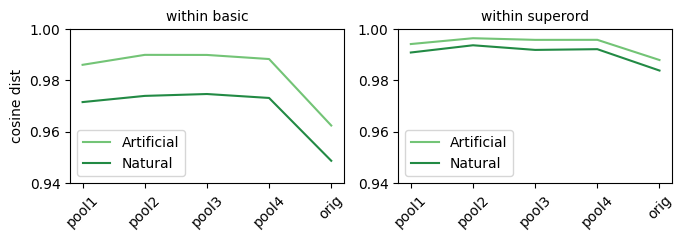

In [9]:
plt.figure(figsize=(12,2))
pi=0

levels = ['within basic','within superord']
for vals, level in zip([within_b_each_supcat, 
                        within_s], \
                      levels):
        
    pi+=1
    ax = plt.subplot(1,3,pi)
    
    lh = []
    
    for kk in [0,1]:
    
        meanvals = np.mean(vals[is_natural==kk,:], axis=0)
    
        h = plt.plot(np.arange(n_image_types), meanvals, color=nat_colors[kk,:])
    
        lh += h
        
    ax.legend(lh, kind_names, loc='lower left');
    plt.xticks(np.arange(n_image_types), image_type_names, rotation=45);

    if pi==1:
        plt.ylabel('cosine dist')

    plt.ylim([0.94, 1.0])
    # plt.ylim([1.0, 1.06])
    
    plt.title(level)

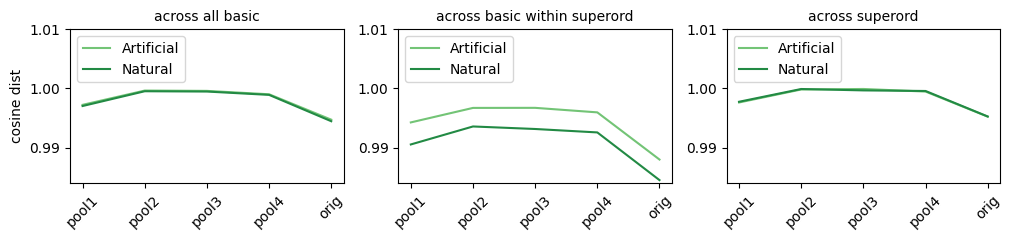

In [10]:
plt.figure(figsize=(12,2))
pi=0

levels = ['across all basic','across basic within superord', 'across superord']
for vals, level in zip([across_b_all_each_supcat,
                        across_b_within_s_each_supcat,
                        across_s], \
                      levels):
        
    pi+=1
    ax = plt.subplot(1,3,pi)
   
    lh = []
    
    for kk in [0,1]:
    
        meanvals = np.mean(vals[is_natural==kk,:], axis=0)
    
        h = plt.plot(np.arange(n_image_types), meanvals, color=nat_colors[kk,:])
    
        lh += h
        
    ax.legend(lh, kind_names, loc='upper left');
    plt.xticks(np.arange(n_image_types), image_type_names, rotation=45);

    if pi==1:
        plt.ylabel('cosine dist')

    plt.ylim([0.984, 1.01])
    # plt.ylim([1.0, 1.06])
    
    plt.title(level)

0.9952202355353277
0.0010693130556517823
0.9867108457021564
0.005293443337885226
0.9869316427278227
0.006795582261273572
0.9583010409773448
0.031718766206277366


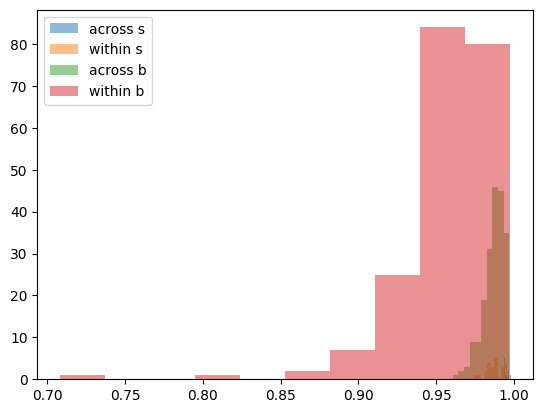

In [11]:
plt.figure()
ii = 4;
for vals in [across_s[:,ii], within_s[:,ii], across_b_within_s[:,ii], within_b[:,ii]]:

    print(np.mean(vals))
    print(np.std(vals))
    plt.hist(vals, alpha=0.5);

plt.legend(['across s','within s', 'across b', 'within b'])

In [12]:
basic_sep_each_supcat.shape, super_sep_each_supcat.shape

((20, 5), (20, 5))

In [11]:
cue_level_colors = np.array([[93,192,219], [44,92,168]])/255


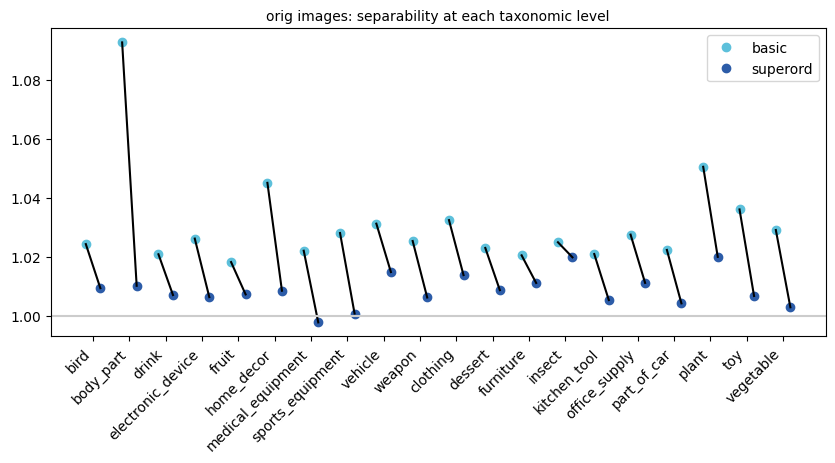

In [13]:
vals = np.array([basic_sep_each_supcat, super_sep_each_supcat])

ii = 4;

xjitters = np.array([-0.2, 0.2])
barwidth = xjitters[1]*2

plt.figure(figsize=(10,4))

lh=[]
for ca in range(n_super):

    for cc in range(2):
        h = plt.plot(ca+xjitters[cc], vals[cc,ca,ii], \
                'o', color=cue_level_colors[cc,:])
        if ca==0:
            lh+=h

    plt.plot(ca+xjitters, vals[:,ca, ii], color='k')

plt.xticks(np.arange(n_super), super_names, rotation=45, ha='right')

plt.axhline(1, color=[0.8, 0.8, 0.8])

plt.title('%s images: separability at each taxonomic level'%image_type_names[ii])

plt.legend(lh, ['basic','superord'])

Text(0.5, 1.0, 'orig images: within-category distances at each taxonomic level')

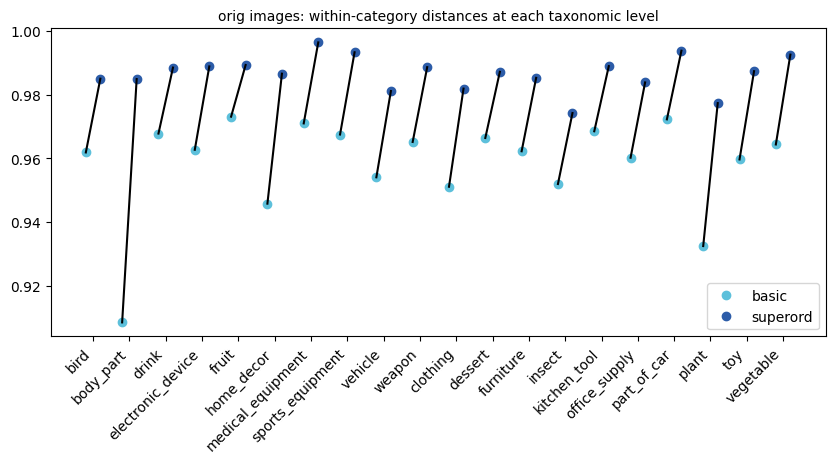

In [13]:
vals = np.array([within_b_each_supcat, within_s])

ii = 4;

xjitters = np.array([-0.2, 0.2])
barwidth = xjitters[1]*2

plt.figure(figsize=(10,4))

lh=[]
for ca in range(n_super):

    for cc in range(2):
        h = plt.plot(ca+xjitters[cc], vals[cc,ca,ii], \
                'o', color=cue_level_colors[cc,:])
        if ca==0:
            lh+=h

    plt.plot(ca+xjitters, vals[:,ca, ii], color='k')

plt.xticks(np.arange(n_super), super_names, rotation=45, ha='right')

# plt.axhline(1, color=[0.8, 0.8, 0.8])

plt.legend(lh, ['basic','superord'])

plt.title('%s images: within-category distances at each taxonomic level'%image_type_names[ii])


Text(0.5, 1.0, 'orig images: across-category distances at each taxonomic level')

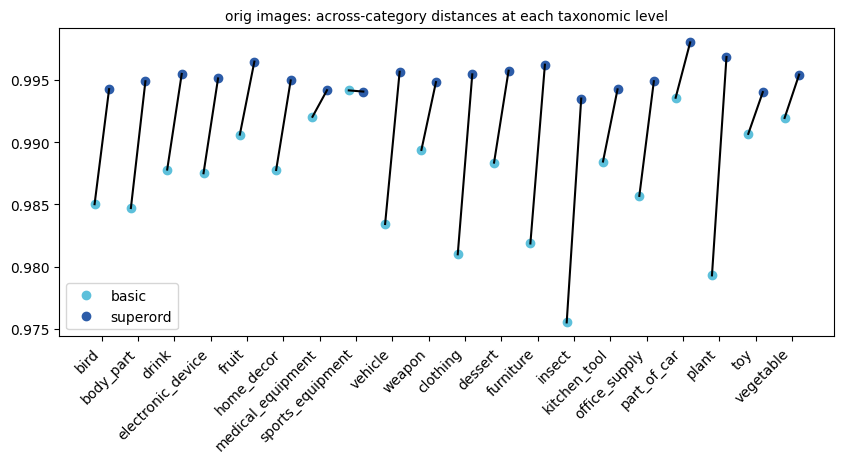

In [14]:
vals = np.array([across_b_within_s_each_supcat, across_s])

ii = 4;

xjitters = np.array([-0.2, 0.2])
barwidth = xjitters[1]*2

plt.figure(figsize=(10,4))

lh=[]
for ca in range(n_super):

    for cc in range(2):
        h = plt.plot(ca+xjitters[cc], vals[cc,ca,ii], \
                'o', color=cue_level_colors[cc,:])
        if ca==0:
            lh+=h

    plt.plot(ca+xjitters, vals[:,ca, ii], color='k')

plt.xticks(np.arange(n_super), super_names, rotation=45, ha='right')

# plt.axhline(1, color=[0.8, 0.8, 0.8])


plt.legend(lh, ['basic','superord'])

plt.title('%s images: across-category distances at each taxonomic level'%image_type_names[ii])
